# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [12]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import newsapi
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# Read your api key environment variable
load_dotenv()
 

True

In [19]:
api_key = os.getenv("NEWS_API")


In [20]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [21]:
# Fetch the Bitcoin news articles
#bitcoin_news = newsapi[newsapi["language"] == "en"]
bitcoin = newsapi.get_everything(
    q="bitcoin AND news AND 2021",
    language="en"
)
bitcoin

{'status': 'ok',
 'totalResults': 916,
 'articles': [{'source': {'id': 'financial-post', 'name': 'Financial Post'},
   'author': 'Bloomberg News',
   'title': 'Bitcoin crashes as El Salvador rollout, price pump falter - Financial Post',
   'description': '<ol><li>Bitcoin crashes as El Salvador rollout, price pump falter\xa0\xa0Financial Post\r\n</li><li>Bitcoin, now legal tender in El Salvador, greeted with tech problems, volatility concerns\xa0\xa0CBC.ca\r\n</li><li>Salvador street protest breaks out against bitcoin adoption…',
   'url': 'https://financialpost.com/fp-finance/cryptocurrency/bitcoin-crashes-as-el-salvador-adoption-price-pump-falters',
   'urlToImage': 'https://smartcdn.prod.postmedia.digital/financialpost/wp-content/uploads/2021/09/vw0907bitcoin-el-salvador.jpg',
   'publishedAt': '2021-09-07T16:05:52Z',
   'content': 'Plunges as much as 17 per cent to US$43,050 \r\nA woman holds a banner that reads "No to bitcoin" during a demonstration against the circulation of bitco

In [22]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(
    q="ethereum AND news AND 2021",
    language="en"
)
ethereum

{'status': 'ok',
 'totalResults': 386,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': 'https://www.facebook.com/bbcnews',
   'title': 'Cryptocurrency heist hacker returns $260m in funds',
   'description': 'The hacker behind the $600m Poly Network cryptocurrency heist has posted a Q&A on the blockchain.',
   'url': 'https://www.bbc.co.uk/news/business-58180692',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/10F22/production/_119901496_hacking1.jpg',
   'publishedAt': '2021-08-11T23:10:49Z',
   'content': 'By Mary-Ann RussonBusiness reporter, BBC News\r\nThe hacker behind one of the largest ever cryptocurrency heists ever has returned almost half of the $600m (£433m) stolen assets.\r\nYesterday, blockchain… [+5117 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'John Foley',
   'title': "Cardano joins crypto's creative destruction loop - Reuters",
   'description': 'Watch out, bitcoin and ether. Cryptocurrency 

In [23]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [24]:
ethereum_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

In [25]:
# Describe the Bitcoin Sentiment
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [26]:
# Describe the Ethereum Sentiment
ethereum_sentiments = pd.DataFrame(ethereum_sentiments)
ethereum_sentiments.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.318350,0.099700,0.028600,0.871850
std,0.458405,0.083449,0.051172,0.082344
min,-0.778300,0.000000,0.000000,0.726000
25%,0.000000,0.000000,0.000000,0.806000
50%,0.514250,0.110000,0.000000,0.852000
75%,0.673075,0.155500,0.059000,0.923250
max,0.868900,0.274000,0.207000,1.000000


In [27]:
bitcoin_sentiments = pd.DataFrame(bitcoin_sentiments)
bitcoin_sentiments.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.318350,0.099700,0.028600,0.871850
std,0.458405,0.083449,0.051172,0.082344
min,-0.778300,0.000000,0.000000,0.726000
25%,0.000000,0.000000,0.000000,0.806000
50%,0.514250,0.110000,0.000000,0.852000
75%,0.673075,0.155500,0.059000,0.923250
max,0.868900,0.274000,0.207000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

ETH has highest mean. BTC has highest compound and posititve scores.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import reuters, stopwords
import re

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 
# Create a list of stopwords
bitcoin_article = reuters.raw(fileids=reuters.fileids(categories='gas')[2])
def clean_text(bitcoin_article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    return output

# Expand the default stopwords list if necessary


In [21]:
# Complete the tokenizer function
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words

    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    


In [22]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

In [23]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
article = reuters.raw(reuters.fileids(categories='gas')[2])
print(article)

EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK
  Distillate fuel stocks held in
  primary storage were unchanged in the week ended April three at
  106.9 mln barrels, the Energy Information Administration (EIA)
  said.
      In its weekly petroleum status report, the Department of
  Energy agency said gasoline stocks were off 200,000 barrels in
  the week to 248.1 mln barrels and refinery crude oil stocks
  rose 6.3 mln barrels to 335.8 mln.
      The EIA said residual fuel stocks fell 100,000 barrels to
  38.1 mln barrels and crude oil stocks in the Strategic
  Petroleum Reserve (SPR) rose 1.1 mln barrels to 520.0 mln.
      The total of all crude, refined product and SPR stocks rose
  9.4 mln barrels to 1,561.1, it said.
  




In [26]:
# Generate the Ethereum N-grams where N=2
article = reuters.raw(reuters.fileids(categories='gas')[2])
print(article)

EIA SAYS DISTILLATE STOCKS UNCHANGED IN WEEK
  Distillate fuel stocks held in
  primary storage were unchanged in the week ended April three at
  106.9 mln barrels, the Energy Information Administration (EIA)
  said.
      In its weekly petroleum status report, the Department of
  Energy agency said gasoline stocks were off 200,000 barrels in
  the week to 248.1 mln barrels and refinery crude oil stocks
  rose 6.3 mln barrels to 335.8 mln.
      The EIA said residual fuel stocks fell 100,000 barrels to
  38.1 mln barrels and crude oil stocks in the Strategic
  Petroleum Reserve (SPR) rose 1.1 mln barrels to 520.0 mln.
      The total of all crude, refined product and SPR stocks rose
  9.4 mln barrels to 1,561.1, it said.
  




In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
top_words = bitcoin[
    (bitcoin["frequency"] >= 10) & (bitcoin["frequency"] <= 30)
]

top_words.head(10)

In [ ]:
# Use token_count to get the top 10 words for Ethereum
top_words2 = ethereum[
    (ethereum["Frequency"] >= 10) & (money_news_df["Frequency"] <= 30)
]

top_words2.head(10)

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thejp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
bitcoin_sent

,text,date,compound,positive,negative,neutral
0,"Plunges as much as 17 per cent to US$43,050 \r...",2021-09-07,-0.2023,0.038,0.060,0.902
1,"August\r\n20, 2021\r\n8 min read\r\nThis story...",2021-08-20,0.6808,0.157,0.000,0.843
2,"Representations of cryptocurrencies Bitcoin, E...",2021-09-03,0.0000,0.000,0.000,1.000
3,In experiments performed at the University of ...,2021-08-23,0.0000,0.000,0.000,1.000
4,Sept 7 (Reuters) - The bonds of Chinese proper...,2021-09-07,-0.0516,0.067,0.074,0.859
5,"August\r\n18, 2021\r\n3 min read\r\nOpinions e...",2021-08-18,-0.3818,0.000,0.077,0.923
6,"August\r\n24, 2021\r\n8 min read\r\nOpinions e...",2021-08-24,0.7184,0.200,0.000,0.800
7,BEIJING (Reuters) -When Xi Jinping took comman...,2021-09-09,0.5574,0.151,0.059,0.791
8,BEIJING (Reuters) -When Xi Jinping took comman...,2021-09-09,0.5574,0.151,0.059,0.791
9,The S&amp;P/TSX Composite Index rose 140 point...,2021-08-30,0.4939,0.110,0.000,0.890


In [32]:
bitcoin_sent["text"]

0     Plunges as much as 17 per cent to US$43,050 \r...
1     August\r\n20, 2021\r\n8 min read\r\nThis story...
2     Representations of cryptocurrencies Bitcoin, E...
3     In experiments performed at the University of ...
4     Sept 7 (Reuters) - The bonds of Chinese proper...
5     August\r\n18, 2021\r\n3 min read\r\nOpinions e...
6     August\r\n24, 2021\r\n8 min read\r\nOpinions e...
7     BEIJING (Reuters) -When Xi Jinping took comman...
8     BEIJING (Reuters) -When Xi Jinping took comman...
9     The S&amp;P/TSX Composite Index rose 140 point...
10    A representations of cryptocurrency Bitcoin an...
11    Dogecoin may not be heading to the moon but it...
12    * China c.bank to stay prudent; yuan rises\r\n...
13    Representation of Bitcoin cryptocurrency is se...
14    August\r\n25, 2021\r\n6 min read\r\nThis story...
15    August\r\n24, 2021\r\n8 min read\r\nThis story...
16    Best Buy (BBY) is a Zacks Rank #1 (Strong Buy)...
17    Personal Finance Insider writes about prod

In [33]:
bitcoin_text= bitcoin_sent["text"].str.cat(sep=' ')

In [34]:
# Generate the Bitcoin word cloud
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]

In [35]:
 def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [36]:
big_string = ' '.join(corpus)
input_words = process_text(big_string)

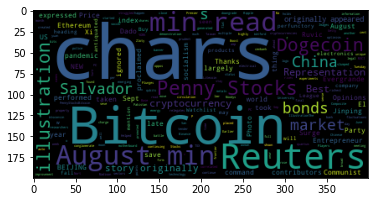

In [37]:
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

In [38]:
# Generate the Ethereum word cloud
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]

In [39]:
 def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [40]:
eth = ' '.join(corpus)
input_words = process_text(eth)

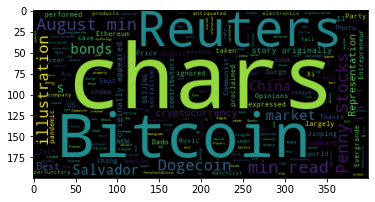

In [41]:
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [9]:
import spacy
from spacy import displacy
from wordcloud import WordCloud

In [10]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
article = reuters.raw(fileids = reuters.fileids(categories='bitcoin')[0])


In [28]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document


In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
doc_e = reuters.raw(fileids = reuters.fileids(categories='bitcoin')

In [32]:
# Run the NER processor on all of the text
for ent in doc_e.ents:
    print(ent.text, ent.label_)
# Add a title to the document


In [33]:
# Render the visualization
displacy.render(doc_e, style='ent') 

In [34]:
# List all Entities
articles = reuters.raw(categories='Ethereum')


---